In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel

The SIR model is a very basic epidemiological model. It divides a population in three possible compartments: Susceptible, Infected, and Recovered. The dynamics are determined by two processes: 

* Infected people infect Susceptible ones based on the probability of interacting

* Infected people become Recovered after a time, thus earning immunity

In mathematical terms, these correspond to three equations:

$$
\frac{dS}{dt} = -\beta S I
$$

$$
\frac{dI}{dt} = \beta S I - \gamma I
$$

$$
\frac{dR}{dt} = \gamma I
$$

. We now see how to reproduce the SIR model in Compyrtment.

In [3]:
# First, define the model
model = CModel('SIR')

beta = 3
gamma = 1

# Now add the couplings
model.set_coupling_rate('S*I:S=>I', beta, name='beta')  # Infection rate
model.set_coupling_rate('I:I=>R', gamma, name='gamma')  # Recovery rate

In [4]:
# Let's see the dynamics from a starting state
I0 = 0.02               # Initial fraction of infected
y0 = [1-I0, I0, 0]

t = np.linspace(0, 10, 1000)  # Time axis

trajectory = model.integrate(t, y0)['y']

<IPython.core.display.Javascript object>


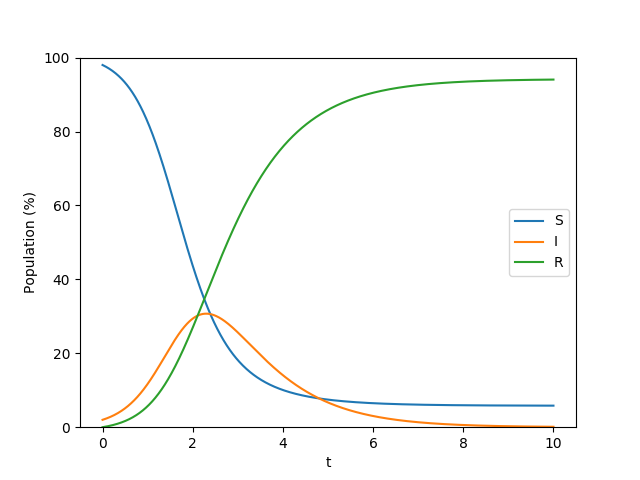

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('Population (%)')
ax.set_ylim(0, 100)

for i, l in enumerate('SIR'):
    ax.plot(t, trajectory[:,i]*100, label=l)
    
ax.legend()

Something useful Compyrtment can also do is compute the *gradient* of the functions with respect to the parameters. This allows us to see how much a small change in parameters would effectively change the result, and thus, how sensitive they are.

In [6]:
# Integrate with gradients

traj_grad = model.integrate(t, y0, use_gradient=True)

<IPython.core.display.Javascript object>


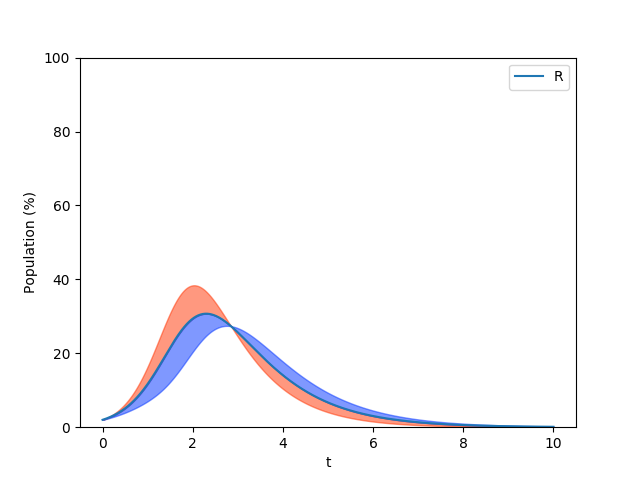

In [7]:
# Plot infected with an error band

dbeta = 0.5

fig, ax = plt.subplots()

ax.set_xlabel('t')
ax.set_ylabel('Population (%)')
ax.set_ylim(0, 100)

ax.plot(t, traj_grad['y'][:,1]*100, label=l)
ax.fill_between(t, (traj_grad['y'][:,1])*100, 
                   (traj_grad['y'][:,1]+traj_grad['dy/d(beta)'][:,1]*dbeta)*100, color=(1, 0.2, 0, 0.5))
ax.fill_between(t, (traj_grad['y'][:,1])*100, 
                   (traj_grad['y'][:,1]-traj_grad['dy/d(beta)'][:,1]*dbeta)*100, color=(0, 0.2, 1, 0.5))

# The red area indicates the way the peak would change if beta *increased*; the blue one, if it decreased.

ax.legend()